<a href="https://colab.research.google.com/github/mahireddy1318/udemy_pytorch/blob/main/01_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import matplotlib.pyplot as plt
print(torch.__version__)

2.0.1+cu118


# Linear regression
**y=aX+b**
where a is weight or gredient or slope
X is varialble
b is bias

In [ ]:
weight = 0.7
bias = 0.3
start = 0
stop=1
step = 0.02
X = torch.arange(start, stop, step).unsqueeze(dim=1)
y= weight * X + bias
X, y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.3000],
         [0.3140],
         [

In [ ]:
#splitting data
train_split = int(len(X)*0.8)
train_split

40

In [ ]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
print(f'X_train:{len(X_train)}, y_train:{len(y_train)}, X_test:{len(X_test)}, y_test:{len(y_test)}')

X_train:40, y_train:40, X_test:10, y_test:10


In [ ]:
#Ploting function
def plotting_prediction(train_data = X_train,
                       train_labels = y_train,
                       test_data = X_test,
                       test_labels = y_test,
                       predictions = None):
    plt.scatter(x=train_data, y=train_labels, c='b', label='Training_data')
    plt.scatter(x=test_data, y=test_labels, c='g', label='Test_data')

    if predictions is not None:
        plt.scatter(X_test, predictions, c="r", s=10, label="Predictions")

  # Show the legend
    plt.legend(prop={'size':14})

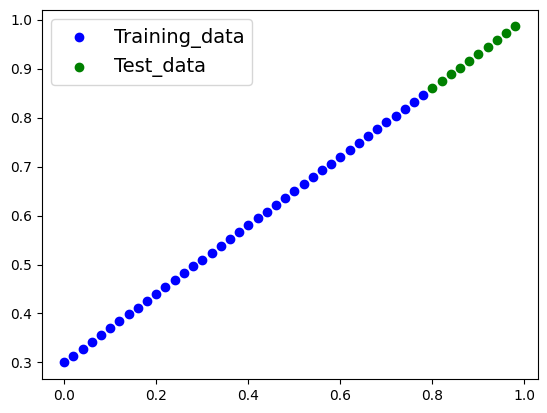

In [ ]:
plotting_prediction()

# 2. Build Model

In [ ]:
import torch
import torch.nn as nn

In [ ]:

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float),
                                   requires_grad = True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float),
                                   requires_grad = True)

    def forward(self, x:torch.Tensor):
        return self.weights * x + self.bias


#  Checking the contents of a PyTorch model

In [ ]:
torch.manual_seed(42)
model0 = LinearRegressionModel()
print(model0)

list(model0.parameters())

LinearRegressionModel()


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

# Making predictions using torch.inference_mode()

In [ ]:
y_pred = model0(X_test)
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [ ]:
with torch.inference_mode():
    y_pred = model0(X_test)
print(y_pred)

#Note: in older PyTorch code you might also see torch.no_grad()
with torch.no_grad():
  y_preds = model0(X_test)
print(y_preds)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


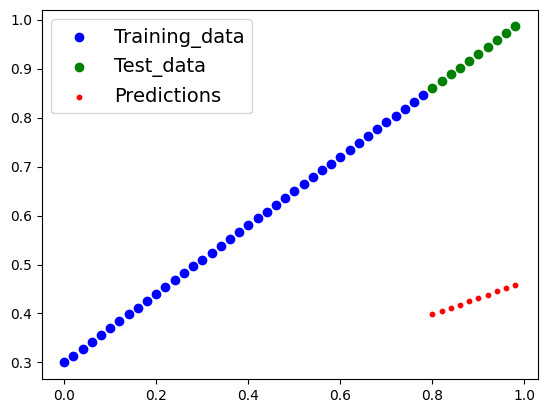

In [ ]:
plotting_prediction(predictions=y_pred)

In [ ]:
loss = y_test - y_pred
loss

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

# Build a training loop in PyTorch
**Creating a loss function and optimizer in PyTorch**

In [ ]:
print('Model0 params Before Training:',model0.state_dict())
list(model0.parameters())

Model0 params Before Training: OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
loss_fn = nn.L1Loss() #MAE loss same as L1loss
optimizer = torch.optim.SGD(model0.parameters(), lr=0.01)

In [ ]:
torch.manual_seed(42)

epochs = 5

for epoch in range(epochs):
    # Put model in training mode (this is the default state of a model)
    model0.train()

    y_pred_new = model0(X_train)

    loss = loss_fn(y_pred_new, y_train)

    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()


In [ ]:
print('Model0 params after 1st epoch:',model0.state_dict())
list(model0.parameters())

Model0 params after 1st epoch: OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])


[Parameter containing:
 tensor([0.3562], requires_grad=True),
 Parameter containing:
 tensor([0.1788], requires_grad=True)]

In [ ]:
with torch.inference_mode():
    y_pred = model0(X_test)

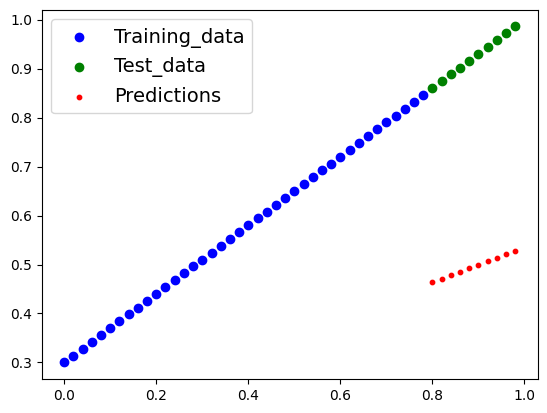

In [ ]:
plotting_prediction(predictions=y_pred)

In [ ]:
loss1 = y_test - y_pred
loss1

tensor([[0.3962],
        [0.4031],
        [0.4100],
        [0.4169],
        [0.4237],
        [0.4306],
        [0.4375],
        [0.4444],
        [0.4512],
        [0.4581]])

**Build Complete Training loop with Evaluation**

In [ ]:
import numpy as np

epoch_count = []
train_loss_values = []
test_loss_values = []

epochs = 100
for epoch in range(epochs):
    model0.train()
    y_pred_new = model0(X_train)

    loss = loss_fn(y_pred_new, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model0.eval()

    with torch.inference_mode():
        y_pred = model0(X_test)
        test_loss = loss_fn(y_pred, X_test)
#         print(type(y_pred))
#         print(type(X_test))

        #print(f'Epoch:{epoch}, loss:{loss}, Test loss:{test_loss}')


        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())  #RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 0.2552763521671295 | MAE Test Loss: 0.3807101845741272 
Epoch: 10 | MAE Train Loss: 0.14006635546684265 | MAE Test Loss: 0.2460002601146698 
Epoch: 20 | MAE Train Loss: 0.06395438313484192 | MAE Test Loss: 0.1405346840620041 
Epoch: 30 | MAE Train Loss: 0.04819351062178612 | MAE Test Loss: 0.0928460881114006 
Epoch: 40 | MAE Train Loss: 0.04343796148896217 | MAE Test Loss: 0.0717095136642456 
Epoch: 50 | MAE Train Loss: 0.039933640509843826 | MAE Test Loss: 0.06068947911262512 
Epoch: 60 | MAE Train Loss: 0.03647511452436447 | MAE Test Loss: 0.05173004791140556 
Epoch: 70 | MAE Train Loss: 0.033043231815099716 | MAE Test Loss: 0.04345749691128731 
Epoch: 80 | MAE Train Loss: 0.02960442565381527 | MAE Test Loss: 0.0361669659614563 
Epoch: 90 | MAE Train Loss: 0.026173178106546402 | MAE Test Loss: 0.03027317486703396 


In [ ]:
# import numpy as np
# #print(train_loss_values.detach.numpy())
# loss.detach().numpy()

In [ ]:
train_loss_values

[array(0.25527635, dtype=float32),
 array(0.14006636, dtype=float32),
 array(0.06395438, dtype=float32),
 array(0.04819351, dtype=float32),
 array(0.04343796, dtype=float32),
 array(0.03993364, dtype=float32),
 array(0.03647511, dtype=float32),
 array(0.03304323, dtype=float32),
 array(0.02960443, dtype=float32),
 array(0.02617318, dtype=float32)]

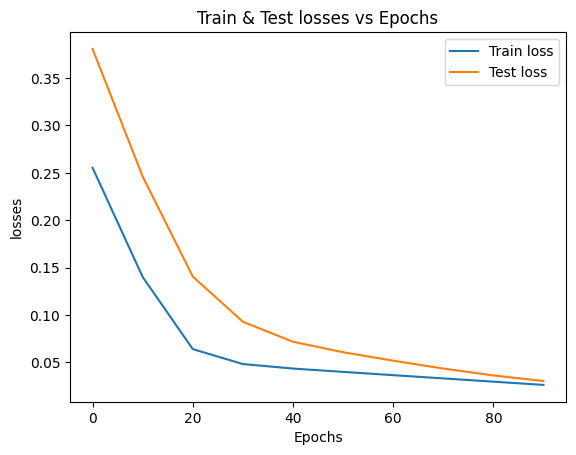

In [ ]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.xlabel('Epochs')
plt.ylabel('losses')
plt.title('Train & Test losses vs Epochs')
plt.legend()
plt.show()

In [ ]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model0.state_dict())
print("\nOriginal values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.5868])), ('bias', tensor([0.3473]))])

Original values for weights and bias are:
weights: 0.7, bias: 0.3


# Making predictions with a trained PyTorch model (inference)

In [ ]:
with torch.inference_mode():
    y_pred = model0(X_test)
y_pred

tensor([[0.8168],
        [0.8285],
        [0.8402],
        [0.8520],
        [0.8637],
        [0.8754],
        [0.8872],
        [0.8989],
        [0.9106],
        [0.9224]])

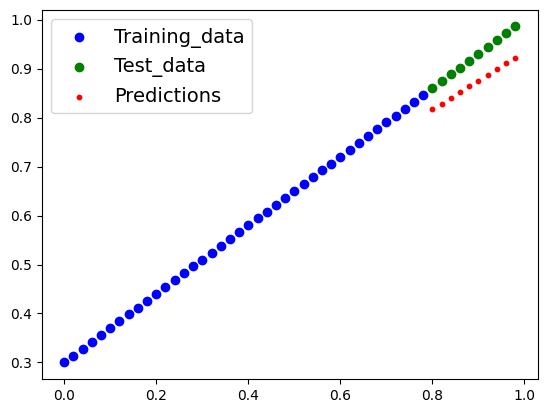

In [ ]:
plotting_prediction(predictions=y_pred)

# 5. Saving and loading a PyTorch model

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(MODEL_SAVE_PATH)

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

models/01_pytorch_workflow_model_0.pth
Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
ls models

01_pytorch_workflow_model_0.pth


**Load saved model and make predictions on it**

In [ ]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
# 1. Put the loaded model into evaluation mode
loaded_model0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model0(X_test) # perform a forward pass on the test data with the loaded model

In [ ]:
#compare trained model y_pred and loaded_model_preds
loaded_model_preds == y_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
print(weight, bias)
loaded_model0.state_dict()

0.7 0.3


OrderedDict([('weights', tensor([0.5868])), ('bias', tensor([0.3473]))])

In [ ]:
#

# Same code using GPU(Put all together)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device:', device)

Device: cuda


In [ ]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

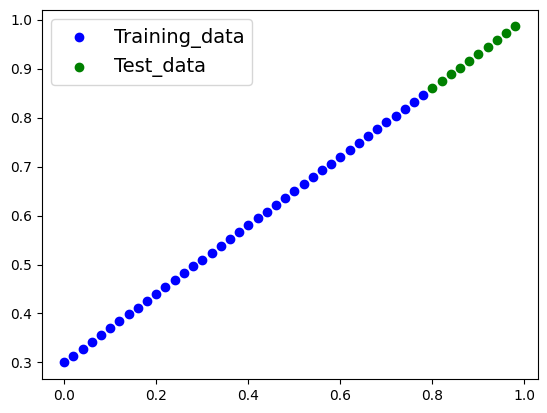

In [ ]:
# Note: If you've reset your runtime, this function won't work,
# you'll have to rerun the cell above where it's instantiated.
plotting_prediction(X_train, y_train, X_test, y_test)

In [ ]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [ ]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set model to GPU if it's availalble, otherwise it'll default to CPU
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)

In [ ]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 100 | Train loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 200 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 300 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 400 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 500 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 600 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 700 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 800 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 900 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882


In [ ]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

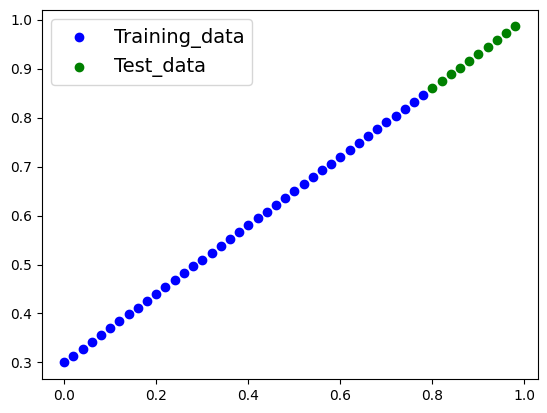

In [ ]:

plotting_prediction()

TypeError: ignored

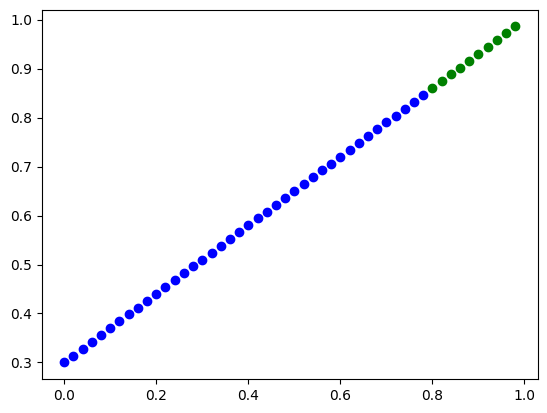

In [ ]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU
# Put data on the CPU and plot it
plotting_prediction(predictions=y_preds.cpu())